In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold

In [14]:
df_original = pd.read_csv('data/Train.zip', compression='zip', header=0, sep=',', quotechar='"')
df = df_original.copy()

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
pd.set_option('display.max.columns', 500)

In [16]:
df.head(4)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null object
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                       4

In [18]:
df['Steering_Controls'].unique()[:]

array(['Conventional', nan, 'Command Control', 'Four Wheel Standard',
       'Wheel', 'No'], dtype=object)

In [19]:
uniques = {}
for col in df.columns:
    uniques[col] = df[col].unique()

In [20]:
401125 - int(401125/14)*14 #14 - (v.size-int(v.size/14)*14)

11

In [21]:
for k,v in uniques.items():
    print(k)
#     n_cols = 10
#     n_append = n_cols - (v.size-int(v.size/n_cols)*n_cols)
#     v = np.append(v, ['' for _ in range(n_append)])
#     v = v.reshape(int(v.size/n_cols),n_cols)
    print(v)
    print()

SalesID
[1139246 1139248 1139249 ... 6333338 6333341 6333342]

SalePrice
[ 66000  57000  10000  38500  11000  26500  21000  27000  21500  65000
  24000  22500  36000  30500  28000  19000  13500   9500  12500  11500
  41000  34500  26000  73000  33000  15500  53000  46000  89000  51000
  14000  31500  18500   8250  20500  39000  58000   7750  32000  12000
  75000   5500  28500  35500  30000   8500  37000  23000   8100  29000
 102000  35000  33500  15000  70000   7500  13000  44000  67000  17000
  52000  50000  25000  25500  17500  64000  16000  56000   6500  19500
  42000  83000  45000  29500  18000   9000  31000   9700  10500  24500
  60000  20000  86000  14500  54000  22000  40000  63000  27500 126000
  49000  16500  74000  84000  94000  47000   5750  61000  76000  62000
  44500  43000  23500 127000  32500  48000  38000  82000  34000   9750
  99000  85000  71000  81000  77000  97000 121000 109000   8000   5250
  62500  14750  68000  72000 141000  93000  11350  59000   6000  95000
  78

In [22]:
df[df['YearMade']>1001].shape

(362940, 53)

In [23]:
sorted(list(uniques['YearMade']))

[1000,
 1919,
 1920,
 1937,
 1942,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

In [24]:
(list(uniques['state']))

['Alabama',
 'North Carolina',
 'New York',
 'Texas',
 'Arizona',
 'Florida',
 'Illinois',
 'Oregon',
 'Ohio',
 'Arkansas',
 'Wisconsin',
 'Kansas',
 'Nevada',
 'Iowa',
 'Maine',
 'Massachusetts',
 'California',
 'Louisiana',
 'Minnesota',
 'New Hampshire',
 'Idaho',
 'Michigan',
 'Mississippi',
 'Georgia',
 'Missouri',
 'South Carolina',
 'Utah',
 'Tennessee',
 'Washington',
 'Virginia',
 'South Dakota',
 'West Virginia',
 'Oklahoma',
 'Pennsylvania',
 'Wyoming',
 'North Dakota',
 'New Jersey',
 'Kentucky',
 'Montana',
 'Alaska',
 'Nebraska',
 'Maryland',
 'Hawaii',
 'Colorado',
 'New Mexico',
 'Indiana',
 'Connecticut',
 'Delaware',
 'Rhode Island',
 'Vermont',
 'Washington DC',
 'Puerto Rico',
 'Unspecified']

In [25]:
df['ProductGroupDesc'].unique()

array(['Wheel Loader', 'Skid Steer Loaders', 'Track Excavators',
       'Backhoe Loaders', 'Track Type Tractors', 'Motor Graders'],
      dtype=object)

In [26]:
df[df['state']=='Unspecified'].shape

(2801, 53)

In [27]:
df.sort_values(by='YearMade')[['saledate','SalePrice','YearMade']]

,saledate,SalePrice,YearMade
348124,11/28/2007 0:00,13500,1000
37243,9/10/1999 0:00,10500,1000
248661,5/24/2006 0:00,34500,1000
248655,3/21/2007 0:00,16000,1000
248622,3/13/2007 0:00,37000,1000
248607,3/1/2001 0:00,15500,1000
248602,2/10/2003 0:00,10750,1000
248600,6/24/2003 0:00,9500,1000
248594,4/5/2007 0:00,30000,1000
248668,12/15/1998 0:00,27000,1000


In [28]:
var1 = 'MachineHoursCurrentMeter'
df[var1].describe()
# print(var1)
# print('unique values', len(uniques[var1]))
# print('min:max ' , np.min(uniques[var1]), )

count    1.427650e+05
mean     3.457955e+03
std      2.759026e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.025000e+03
max      2.483300e+06
Name: MachineHoursCurrentMeter, dtype: float64

In [29]:
100*365*24

876000

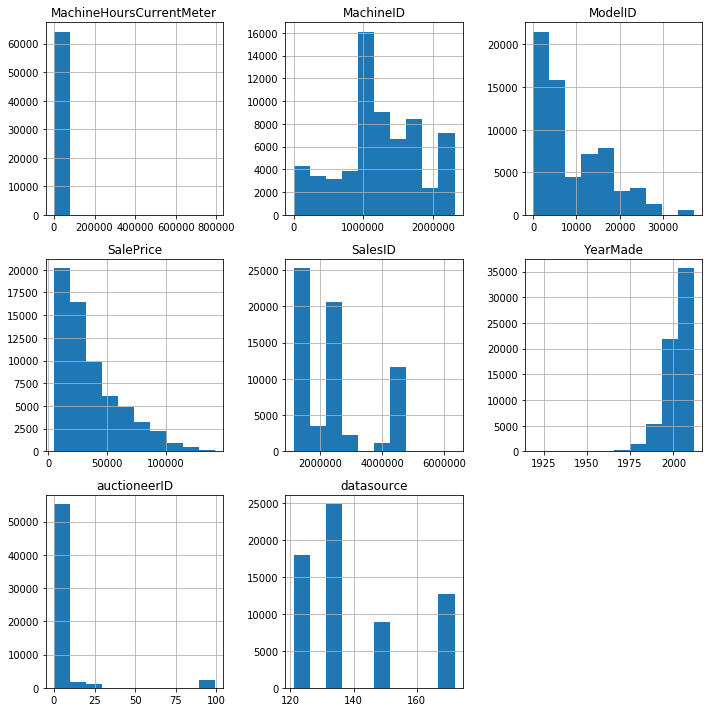

In [30]:
df2 = df[df['YearMade']>1001]
df2 = df2[df2['MachineHoursCurrentMeter'] > 0]
df2[df2[var1] < 800000].hist(figsize=(10,10))
plt.tight_layout()

In [31]:
df3 = df[df['YearMade']>1001]
df3.shape

(362940, 53)

In [32]:
df['ProductGroupDesc'].isnull().sum()

0

In [33]:
#scatter_matrix(df[['MachineHoursCurrentMeter','YearMade','SalePrice']], diagonal='kde', alpha=0.2, figsize=(10,10))

In [34]:
#saledate = df.saledate
df2["saleyear"] = [int(row.split('/')[2][:4]) for row in df2['saledate']]
df2[df2['saleyear'] - df2['YearMade'] > 0].shape
#df.saledate.split('/')[2]  #[6:10]

(64519, 54)

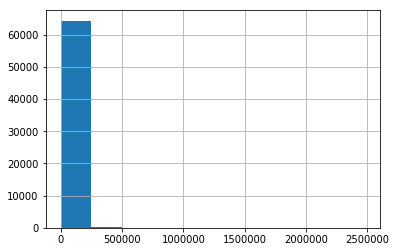

In [35]:
df2[var1].hist()

# ^Disorder

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression


In [37]:
# "ProductGroupDesc"
# Age = year sold - year made

## Clean Data

In [38]:
df['saleyear'].isnull().sum()

KeyError: 'saleyear'

In [39]:
df = df_original.copy()

In [40]:
#DROP YearMade == 1000
df = df[df['YearMade'] > 1000]

In [41]:
#COMPUTE AGE
df["saleyear"] = np.array([int(row.split('/')[2][:4]) for row in df['saledate']])
df['MachineAge'] = df['saleyear'] - df['YearMade']

#SCALE MACHINE AGE
age_range = np.max(df.MachineAge) - np.min(df.MachineAge)
df['MachineAge_scaled'] = (df.MachineAge-np.min(df.MachineAge))/age_range

In [ ]:
df = df[['test1','test2']]
df['test'].isnull().sum()

## Generate Feature Data Set

In [42]:
# "ProductGroupDesc" - LOOKS GOOD!!
#CREATE 1-HOT ENOCDED 
var2 = 'ProductGroupDesc'
var2_dummies = pd.get_dummies(df[var2])
var2_dummies = var2_dummies.drop(var2_dummies.columns[-1], axis=1)
var2_dummies.head()

,Backhoe Loaders,Motor Graders,Skid Steer Loaders,Track Excavators,Track Type Tractors
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,1,0,0


In [43]:
#ONLY RUN ONCE
#JOIN DUMMIES TO DATAFRAME
# df = df.join(var2_dummies)

## Create Model

In [59]:
#CREATE Data Set - JOIN DUMMIES ONTO JUST FEATURES WE WANT
X_linear = df[['MachineAge']].join(var2_dummies)
X_linear.head()


y_linear = df['SalePrice']

In [65]:
X_linear

,MachineAge,Backhoe Loaders,Motor Graders,Skid Steer Loaders,Track Excavators,Track Type Tractors
0,2,0,0,0,0,0
1,8,0,0,0,0,0
2,3,0,0,1,0,0
3,10,0,0,0,1,0
4,2,0,0,1,0,0
5,4,1,0,0,0,0
6,11,0,0,0,1,0
7,4,1,0,0,0,0
8,1,0,0,0,1,0
10,4,1,0,0,0,0


In [68]:
print(len(y_linear))
print(len(X_linear))

362940
362940


In [69]:
y_linear.shape

(362940,)

In [45]:
#SANITY CHECK
print(X_linear.isnull().sum() ) 
print(y_linear.isnull().sum() )

MachineAge             0
Backhoe Loaders        0
Motor Graders          0
Skid Steer Loaders     0
Track Excavators       0
Track Type Tractors    0
dtype: int64
0


In [46]:
y_linear.head()

0    66000
1    57000
2    10000
3    38500
4    11000
Name: SalePrice, dtype: int64

In [47]:
#CREATE TRAIN AND TEST SETS
from sklearn.model_selection import KFold, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.20)

In [48]:
#CREATE LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

def fit_model(X_train, y_train):
    model = LinearRegression(fit_intercept=True, n_jobs = -1)
    model.fit(X_train,y_train)
    return model

In [49]:
#TRAIN THE MODEL
Lin_model = fit_model(X_train, y_train)

In [50]:
Lin_model.score(X_test, y_test)

0.37962218665025704

## Calculate Quality of Model

In [51]:
#GET THE BETAS for ....
# MachineAge             
# Backhoe Loaders        
# Motor Graders          
# Skid Steer Loaders     
# Track Excavators       
# Track Type Tractors

# const                   72516.953539
# MachineAge            -144082.093311
# Backhoe Loaders        -23001.786193
# Motor Graders           17966.386557
# Skid Steer Loaders     -36538.184814
# Track Excavators        -6874.489944
# Track Type Tractors     -1213.326357

Lin_model.coef_

array([ -1385.42523281, -23114.01440168,  17826.77806487, -36685.76887016,
        -6977.1549092 ,  -1401.92738126])

In [52]:
Lin_model.intercept_

56010.00934594625

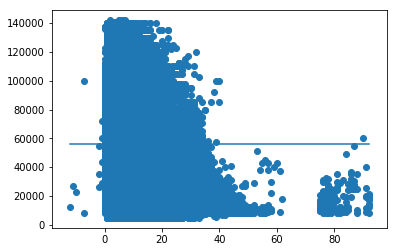

In [71]:
#THIS IS CRAP!!!!

x = np.linspace(np.min(df.MachineAge), 
               np.max(df.MachineAge),
               num=250)
y_hat = Lin_model.intercept_ + 1/x*Lin_model.coef_[0]

# age_range = np.max(df.MachineAge) - np.min(df.MachineAge)
# df['MachineAge_scaled'] = (df.MachineAge-np.min(df.MachineAge))/age_range
#Scale 

fig, axs = plt.subplots(1)
axs.plot(x,y_hat)
axs.scatter(df.MachineAge, df.SalePrice)

In [54]:
X_test[X_test.columns[0]]

191492     2
67974      7
292101     5
56813      9
383412     5
59706      3
135088     8
312066     9
68099     23
39856      8
295056    14
111185     9
136900     4
224205     7
134783    11
395629     5
272165     5
258651    13
255324     3
325871     7
381677    13
281978     5
2039      10
146103    11
387744     9
52872     15
208777    10
183719     6
46300      3
291571     6
          ..
359512     6
377920    23
223517     2
173063     7
180893     9
111978     6
171540    13
59622      4
85762      4
185403    11
4862       5
88188      5
257955     4
346108     4
251066    16
192388     3
164659     4
351918     8
243512     3
58816      3
172551     4
267925    11
157839     2
199280     6
188736     9
64841     12
116501    18
138842     4
253487     8
94123      9
Name: MachineAge, Length: 72588, dtype: int64

In [55]:
# #CALCULATE MSLE - SUGGEST DOING THIS AS A FORLOOP
def msle(X_test, y_test):
    y_hat = Lin_model.intercept_ \
            + X_test[X_test.columns[0]]*Lin_model.coef_[0] \
            + X_test[X_test.columns[1]]*Lin_model.coef_[1] \
            + X_test[X_test.columns[2]]*Lin_model.coef_[2] \
            + X_test[X_test.columns[3]]*Lin_model.coef_[3] \
            + X_test[X_test.columns[4]]*Lin_model.coef_[4] \
            + X_test[X_test.columns[5]]*Lin_model.coef_[5] 

    return np.sqrt( np.sum( (np.log(1+y_test) - np.log(1+y_hat))**2 )/len(y_test) )

# #CALCULATE MSLE - SUGGEST DOING THIS AS A FORLOOP
def msle2(y_hat, y_test):
    return np.min(y_hat)
    #return np.sqrt( np.sum( (np.log(1+y_test) - np.log(1+y_hat))**2 )/len(y_test) )

In [56]:
np.log(-1)

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

In [60]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [61]:
#CALCULATE MSLE

msle(X_test, y_test)

/home/asus/.virtualenvs/gurus/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


0.5610504131779027

In [63]:
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.model_selection import KFold
    
#DO A KFOLD CROSS VALIDATION
# n_folds = 5
# KF = KFold(n_splits=n_folds)
X = X_linear.values
y = y_linear.values
KF = KFold(4)

msle = []
for train_index, test_index in KF.split(X):
    # fit my model on training index of X, y
    
    model = LinearRegression()
    model.fit(X[train_index], y[train_index])
    
    # predict model on test index using X
    y_predict = model.predict(X[test_index])
    y_predict = np.absolute(y_predict)
    
    # grab true values of y of the test_index
    #print(y_predict.shape)
    y_true = y[test_index]    
    MSLE = rmsle(y = y_true,y_pred = y_predict)
    
    #print(type(y_predict), type(y_true))
   # MSLE = np.sqrt( np.sum( (np.log(1+y_true) - np.log(1+y_predict))**2 )/len(y_true) )
    msle.append(MSLE)
    #Scores created by using true and predicted values
    #accuracies.append(accuracy_score(y_true, y_predict))
    #precisions.append(precision_score(y_true, y_predict))
    #recalls.append(recall_score(y_true, y_predict))
print(msle)

[0.5376632269038207, 0.5343392960878643, 0.6872362616331895, 0.6422294939653825]


In [401]:
y_true

array([ 66000,  57000,  10000, ..., 110000,  85000,  60000], dtype=int64)

In [397]:
X.shape

(362940, 6)

## Try again with Stats Model

In [ ]:
#Example

# import statsmodels.api as sm
# X = sm.add_constant(X) # adding a constant

# model = sm.OLS(Y, X).fit()
# predictions = model.predict(X)

# print_model = model.summary()
# print(print_model)

In [321]:
# import statsmodels.api as sm
# X_train = sm.add_constant(X_train)
# Lin_model = sm.OLS(y_train, X_train).fit()
# y_train_pred = Lin_model.predict(X_train)
# print(Lin_model.summary())

In [322]:
# Lin_model.params

## ^Just Kidding